## What is Correlation?

One or mores variable could cause or depend on the values of auother variable.

The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. An example is linear regression, where one of the offending correlated variables should be removed in order improve the wkill of the model.

We may also br interested in the correlation between input variables with the output variable in order provide insight into which variables may or may not be relevant as input for developing a model.

The structure of the relationship may be known, e.g. it may be linear, or we may have no idea whether a relationship exists between two variables or what structure it may take. Depending what is known aobut the relationship and the distribution of the variables, different correlation scores can be calculated.

# Test Dataset

We will generate 1000 samples of two two vauev with a strong positive corralation. The first variable will be random numbers drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 20. The second variable will be values from the first variable with Gaussuian noise added with a mean of a 50 and a standard deviation of 10.

We will use the randn() function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, then multiply the results by out won standard deviation and add the meanto shift the values into the prederred range.

The pseudorandom number generator is seeded to ensure that we get the same sample of numbers each time the code is run.


data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


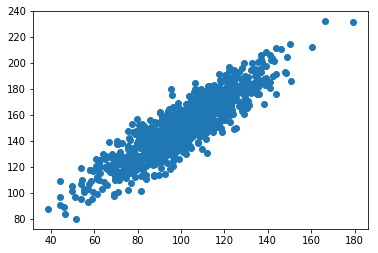

In [1]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

Running the example first prints the mean and standard deviation for each variable.

A scatter plot of the two variables is created. Because we contrived the dataset, we know there is a relationship betkeeen the two variables. This clear when we review the generated scatter plot where we can see an increasing trend.

Before we look at calculation some correlation scores, we must first look at an important statistical building block, called covariance.

## Covariance

Variables can be related by a linear relationship. This is a relationship that is consistently additive across the two data samples.

This relationship can be summarized between two variables called the covariance. It is calculated as the average of the produvt between the values from each sample, where the values haven been centered (had their mean subtracted).

The calculation of the sample covariance is as follows:
`cov(X,Y)=(sum(x-mean(X))*(y-mean(Y)))*1/(n-1)`

The use of the mean in calculation suggests the need for each data sample to have a Gaussian or Gaussian-like distribution.

The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). The magnitude of the covariance is not easily interpreted. A covariance value of zero indicates that both variables are completely independent.

The *cov()* NumPy function can be used to calculate a covariance matrix between two or more variables.
`covariance = cov(data1,data2)`

The main diagonal of the matrix contains the covariance between each variable and itself. The other values in the matric represent the covariance between the two variables; in this case, the reamining two values are the same given that we are calculating the covariance for only two variables.

We can calculate the covariance matrix for the two variables in our test problem.

The complete example is listed below.

In [2]:
# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[ 385.33297729  389.7545618 ]
 [ 389.7545618   500.38006058]]


The covariance and covariance matrix are used widely within statistics and multivariate analysis to characterize the relationships between two or more variables.

Because the dataset was contrived with each variable drawn from a Gaussian distribution and the variables linearly correlated, covarianve is a reasonable method for describing method for describing the relationship.

The covariance between the two variable is 389.75. We can see that it is positive, suggesting the variables change in the same direction as we expect.

A problem with covarianve as a statistical tool alone is that it is challenging to interpret. This leads us to the Pearson's correlation coefficient next.

## Pearson's Correlation

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covarianve between the two variables to give an interpretable score.
`Pearson's correlation coefficient = covariance(X,Y)/(stdv(X) * stdv(Y))`

The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

The *pearsonr()* Scipy function can be used to calculate the Pearson's correlation coefficient between two data samples with the same length.

We can calculate the correlation between the two variables in our variables in our test problem.

The complete example is listed below.

In [3]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


Running the example calculates and prints the Pearson's correlation coefficient.

We can see that the two variables are positively correlated and that the correlation is 0.8. This suggests a high level of correlationm e.g. a value above 0.5 and close to 1.0.

The Pearson's correlation coefficient can be used to evaluate the relationship between more than two variables.

This can be done by calulating a matrix of the relationships between each pair of variables in the dataset. The result is symmetric matrix called a correlation matrix woth a value of 1.0 along the main diahonal as each column always perfectly correlates with itself.

## Spearman's Correlation

Two variables may be related by nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

Further, the two variables being considered may have a non-Gaussian distribution.

In this case, the Spearman's correlation coefficient (named for Charles Spearman) can be used to summarize the strength between the two data samples. 

This test of relationship can also be used if there is a linear relationship between the variables, but will have sightly less power(e.g. may result in lower coefficient scores).

As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positive;y correlated respectively.

Instead of calculating the coefficient using covariance and standard deviations on the samples themseleves, these statistics are calculated form the relative rank of values on each sample. This is a common approach used in ini-parametric statistics,e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.
`Spearman's correlation coefficient = covarianve(rank(X),rank(Y))/(stdv(rank(X)) * stdv(rank(Y)))`

A linear relationship between the variables is not assumed, although a monotonic relationship is assumed. This is a mathematical name for an increasing or decreasing relationship between the two variables.

If you are unsure of the distribution and possible relationships between two variables, Spearman correlation coefficient is a good tool to use.

The *spearmanr()* SciPy function can be used to calculate the Spearman's correlation coeffivient between two dada samples with the same leangth.

We can calculate the correlation between the two variables in our test problem.

The complete example is listed below.

In [4]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


Running the example calculates and prints the spearman's correlation coefficient. 

We know that the data is Gaussian and that the relationship between the variables is linear. Nevertheless, the nonparametric rank based approach shows a astrong correlation between the variables of 0.8.

As with the Pearson's correlation coefficient, the coefficient can be calculated pair-wise for each variable in a dataset to give a correlation matrix for revied.